In [1]:
from scipy import stats

In [2]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero.
    stderr : float
        Standard error of the estimated gradient.
    
    See also
    --------
    :func:`scipy.optimize.curve_fit` : Use 

In [3]:
import pandas as pd
import pandas_datareader as web

In [4]:
spy_etf = web.DataReader('SPY', 'google')

In [5]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2016-09-22 to 2017-09-19
Data columns (total 5 columns):
Open      249 non-null float64
High      249 non-null float64
Low       249 non-null float64
Close     250 non-null float64
Volume    250 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [6]:
spy_etf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-09-22,217.00,217.53,216.71,217.18,76678713
2016-09-23,216.72,216.88,215.88,215.99,73630921
2016-09-26,215.02,215.23,214.01,214.24,89827305
2016-09-27,214.05,215.68,213.62,215.57,78494829
2016-09-28,215.83,216.82,214.71,216.64,87411015


In [7]:
start = pd.to_datetime('2010-01-04')

In [8]:
end = pd.to_datetime('2017-07-25')

In [9]:
aapl = web.DataReader('AAPL', 'google', start, end)

In [10]:
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-09-22,114.35,114.94,114.00,114.62,31073984
2016-09-23,114.42,114.79,111.55,112.71,52481151
2016-09-26,111.64,113.39,111.55,112.88,29869442
2016-09-27,113.00,113.18,112.34,113.09,24607412
2016-09-28,113.69,114.64,113.43,113.95,29641085


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

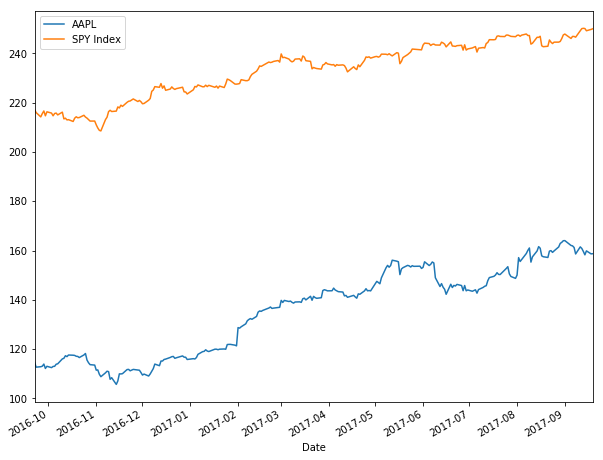

In [12]:
aapl['Close'].plot(label='AAPL', figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [14]:
aapl['Cumulative'] = aapl['Close'] / aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close'] / spy_etf['Close'].iloc[0]

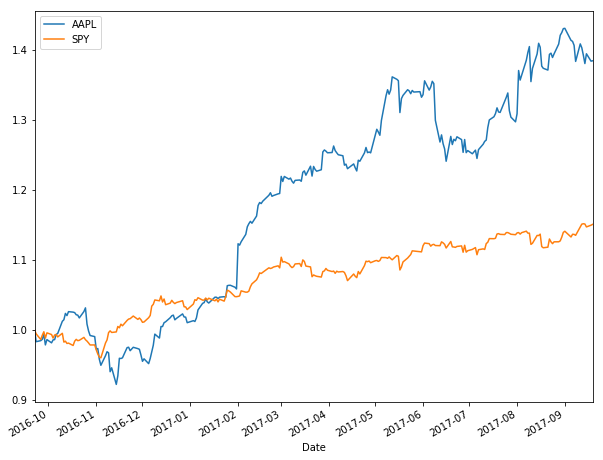

In [15]:
aapl['Cumulative'].plot(label='AAPL', figsize=(10,8))
spy_etf['Cumulative'].plot(label=('SPY'))
plt.legend()

In [17]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

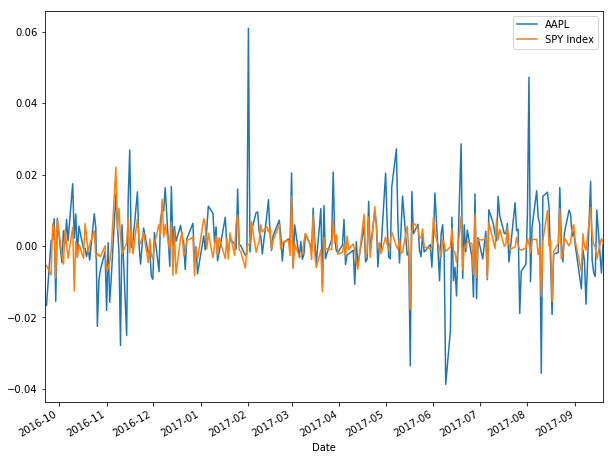

In [18]:
aapl['Daily Return'].plot(label='AAPL', figsize=(10,8))
spy_etf['Daily Return'].plot(label='SPY Index')
plt.legend()

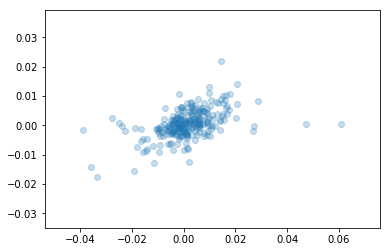

In [19]:
plt.scatter(aapl['Daily Return'], spy_etf['Daily Return'], alpha=0.25)

In [21]:
beta, alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:], spy_etf['Daily Return'].iloc[1:]) 

In [22]:
beta

0.22728892375792495

In [23]:
alpha

0.00026634495515601863

In [24]:
r_value

0.49987821735234711

In [25]:
import numpy as np

In [27]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [28]:
noise

array([ -3.17740759e-04,   1.30419910e-03,  -4.85112538e-04,
         4.91761223e-04,   7.87676369e-04,   1.19224681e-03,
         2.00753230e-03,   1.41990724e-03,   2.63347541e-04,
        -2.74608268e-04,  -3.55690283e-04,   1.27480075e-03,
        -1.59169017e-03,   1.16260650e-03,  -5.79943478e-04,
        -2.36472410e-04,   1.33507204e-03,   1.18675193e-03,
         1.50075582e-04,   1.17098520e-03,   4.20079250e-04,
        -1.75089274e-03,   2.34868939e-04,   3.55459201e-04,
         1.05211264e-03,   4.44469844e-04,  -5.89143323e-04,
        -2.95424724e-04,  -7.86415062e-04,   1.53165096e-03,
         2.80292934e-04,   5.04848106e-04,  -1.21613404e-03,
         1.07915576e-03,   1.13222697e-03,  -3.95843922e-04,
         8.35768057e-04,   1.53334850e-03,  -1.69669415e-03,
         1.23655485e-03,  -8.13118622e-04,  -4.59089721e-04,
        -3.63118593e-04,   2.55294772e-03,   7.27918366e-05,
        -2.47616701e-04,  -2.26154826e-04,   2.25881805e-03,
         7.12631562e-04,

In [30]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

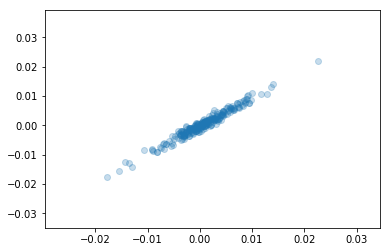

In [31]:
plt.scatter(fake_stock, spy_etf['Daily Return'].iloc[1:], alpha=0.25)

In [33]:
beta, alpha, r_value, p_value, std_err = stats.linregress(fake_stock, 
                                                          spy_etf['Daily Return'].iloc[1:]) 

In [34]:
beta

0.95194744473008208

In [35]:
alpha

-0.00010706414724521171

In [36]:
r_value

0.98056922654767498

In [37]:
p_value

9.9014361652850764e-177